<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.492898,26.525209,65.317742,429.303673,567.639522,201.617390,366.022132
1,0.0,1.0,54.495363,51.893265,77.715465,372.957810,567.061904,213.489369,353.572535
2,0.0,2.0,94.784888,69.738889,54.909648,2558.014627,2787.448052,203.067647,2584.380405
3,0.0,3.0,90.402539,77.955113,47.630837,2568.740732,2794.729221,72.020617,2722.708604
4,0.0,4.0,38.783225,66.582588,50.098292,-4150.884529,-3985.420424,-161.260905,-3824.159518
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.235835,70.214307,39.466361,-1537.482794,-1371.566292,-140.474641,-1231.091651
249996,999.0,246.0,98.385925,45.158504,53.321148,-1622.685918,-1415.820340,392.125034,-1807.945374
249997,999.0,247.0,97.611830,51.401955,29.261671,-1869.313106,-1681.037650,147.313143,-1828.350794
249998,999.0,248.0,26.709307,32.112791,36.750643,447.080233,552.652974,-181.299541,733.952516


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.492898,26.525209,65.317742,429.303673,567.639522,201.617390,366.022132
1,0.0,1.0,54.495363,51.893265,77.715465,372.957810,567.061904,213.489369,353.572535
2,0.0,2.0,94.784888,69.738889,54.909648,2558.014627,2787.448052,203.067647,2584.380405
3,0.0,3.0,90.402539,77.955113,47.630837,2568.740732,2794.729221,72.020617,2722.708604
4,0.0,4.0,38.783225,66.582588,50.098292,-4150.884529,-3985.420424,-161.260905,-3824.159518
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.235835,70.214307,39.466361,-1537.482794,-1371.566292,-140.474641,-1231.091651
249996,999.0,246.0,98.385925,45.158504,53.321148,-1622.685918,-1415.820340,392.125034,-1807.945374
249997,999.0,247.0,97.611830,51.401955,29.261671,-1869.313106,-1681.037650,147.313143,-1828.350794
249998,999.0,248.0,26.709307,32.112791,36.750643,447.080233,552.652974,-181.299541,733.952516


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,36.492898,26.525209,65.317742,429.303673,567.639522,201.617390,366.022132
1,0.0,1.0,54.495363,51.893265,77.715465,372.957810,567.061904,213.489369,353.572535
2,0.0,2.0,94.784888,69.738889,54.909648,2558.014627,2787.448052,203.067647,2584.380405
3,0.0,3.0,90.402539,77.955113,47.630837,2568.740732,2794.729221,72.020617,2722.708604
4,0.0,4.0,38.783225,66.582588,50.098292,-4150.884529,-3985.420424,-161.260905,-3824.159518
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,46.235835,70.214307,39.466361,-1537.482794,-1371.566292,-140.474641,-1231.091651
249996,999.0,246.0,98.385925,45.158504,53.321148,-1622.685918,-1415.820340,392.125034,-1807.945374
249997,999.0,247.0,97.611830,51.401955,29.261671,-1869.313106,-1681.037650,147.313143,-1828.350794
249998,999.0,248.0,26.709307,32.112791,36.750643,447.080233,552.652974,-181.299541,733.952516


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    36.492898  26.525209  ...  201.617390   366.022132
      1.0    54.495363  51.893265  ...  213.489369   353.572535
      2.0    94.784888  69.738889  ...  203.067647  2584.380405
      3.0    90.402539  77.955113  ...   72.020617  2722.708604
      4.0    38.783225  66.582588  ... -161.260905 -3824.159518
...                ...        ...  ...         ...          ...
999.0 245.0  46.235835  70.214307  ... -140.474641 -1231.091651
      246.0  98.385925  45.158504  ...  392.125034 -1807.945374
      247.0  97.611830  51.401955  ...  147.313143 -1828.350794
      248.0  26.709307  32.112791  ... -181.299541   733.952516
      249.0  34.816609  51.338558  ... -283.128057   -47.887459

[250000 rows x 7 columns]

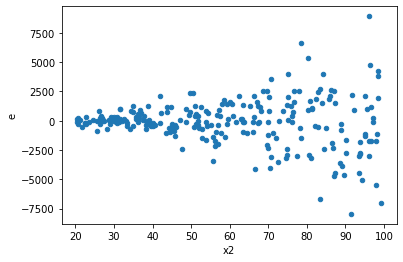

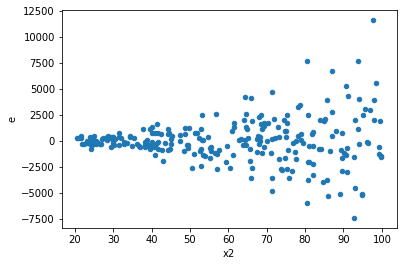

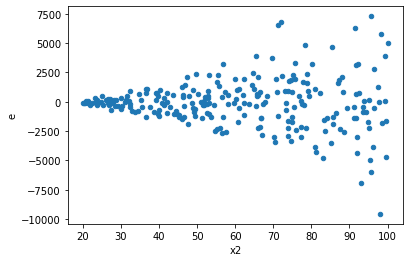

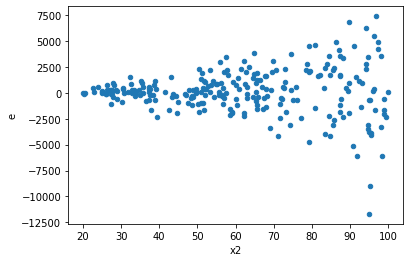

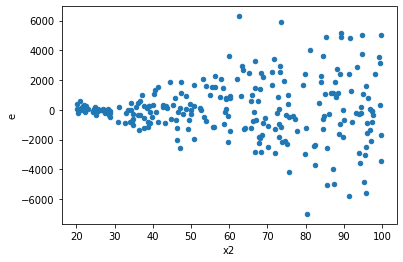

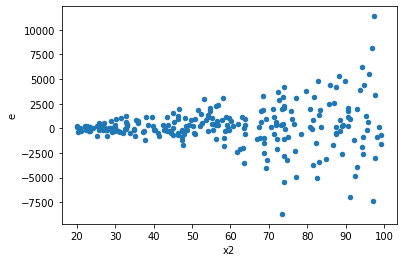

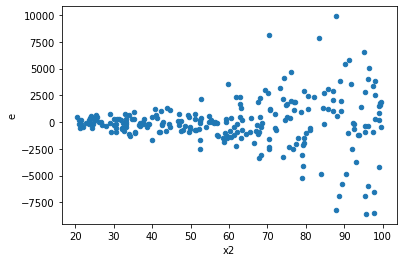

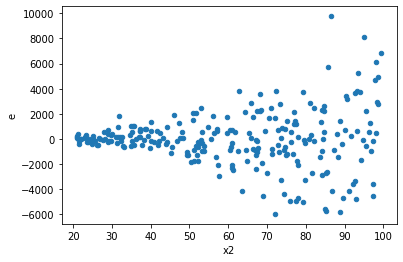

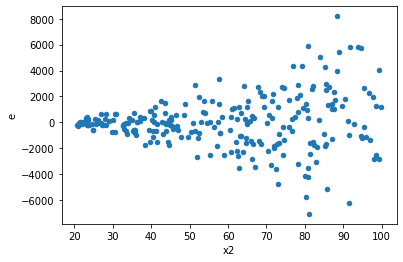

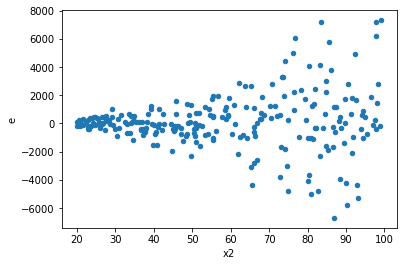

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,841134372.9051802,47577566.139017165,8761816.384428961,495599.6472814288,17.67922239753637,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,968942809.0408802,52492597.0253265,10093154.260842502,546797.8856804844,18.45865634297703,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,881620410.1229429,52960834.876058176,9183545.938780656,551675.3632922727,16.646648644912016,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,1042014005.4676008,68216348.92080572,10854312.556954175,710586.9679250596,15.2751359747691,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,724343782.3810139,59215301.64729231,7545247.733135561,616826.0588259615,12.232375116409381,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,930237902.5228113,34985314.42552042,9689978.151279284,364430.35859917104,26.589382367941194,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,1199135241.30364,39910831.09381006,12490992.096912915,415737.8238938548,30.045358827158548,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,945617405.6842772,59611541.51930408,9850181.30921122,620953.5574927508,15.862991990872382,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,789279988.4069514,55976539.7170026,8221666.545905744,583088.9553854438,14.10019255204536,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,841134372.9051802,47577566.139017165,8761816.384428961,495599.6472814288,17.67922239753637,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,968942809.0408802,52492597.0253265,10093154.260842502,546797.8856804844,18.45865634297703,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,881620410.1229429,52960834.876058176,9183545.938780656,551675.3632922727,16.646648644912016,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,1042014005.4676008,68216348.92080572,10854312.556954175,710586.9679250596,15.2751359747691,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,724343782.3810139,59215301.64729231,7545247.733135561,616826.0588259615,12.232375116409381,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,930237902.5228113,34985314.42552042,9689978.151279284,364430.35859917104,26.589382367941194,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,1199135241.30364,39910831.09381006,12490992.096912915,415737.8238938548,30.045358827158548,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,945617405.6842772,59611541.51930408,9850181.30921122,620953.5574927508,15.862991990872382,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,789279988.4069514,55976539.7170026,8221666.545905744,583088.9553854438,14.10019255204536,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64